<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Boston-Housing-Prices-Regression" data-toc-modified-id="Boston-Housing-Prices-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Boston Housing Prices Regression</a></span></li><li><span><a href="#Load-libraries-and-data" data-toc-modified-id="Load-libraries-and-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load libraries and data</a></span></li><li><span><a href="#Helper-functions" data-toc-modified-id="Helper-functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Helper functions</a></span></li><li><span><a href="#Inspect-and-visualize-the-data" data-toc-modified-id="Inspect-and-visualize-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Inspect and visualize the data</a></span><ul class="toc-item"><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Descriptive statistics</a></span></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Visualizations</a></span></li></ul></li><li><span><a href="#Model-the-data" data-toc-modified-id="Model-the-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model the data</a></span><ul class="toc-item"><li><span><a href="#Create-validation-data-set" data-toc-modified-id="Create-validation-data-set-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Create validation data set</a></span></li><li><span><a href="#Build-models" data-toc-modified-id="Build-models-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Build models</a></span><ul class="toc-item"><li><span><a href="#Build-model-function" data-toc-modified-id="Build-model-function-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Build model function</a></span></li><li><span><a href="#Initial-pass" data-toc-modified-id="Initial-pass-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Initial pass</a></span></li><li><span><a href="#Hyperparameter-tuning" data-toc-modified-id="Hyperparameter-tuning-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Hyperparameter tuning</a></span><ul class="toc-item"><li><span><a href="#Standardize-the-data-and-run-the-models" data-toc-modified-id="Standardize-the-data-and-run-the-models-5.2.3.1"><span class="toc-item-num">5.2.3.1&nbsp;&nbsp;</span>Standardize the data and run the models</a></span></li><li><span><a href="#Best-model-hyperparameter-tuning" data-toc-modified-id="Best-model-hyperparameter-tuning-5.2.3.2"><span class="toc-item-num">5.2.3.2&nbsp;&nbsp;</span>Best model hyperparameter tuning</a></span></li><li><span><a href="#Further-linear-and-nonlinear-model-tuning" data-toc-modified-id="Further-linear-and-nonlinear-model-tuning-5.2.3.3"><span class="toc-item-num">5.2.3.3&nbsp;&nbsp;</span>Further linear and nonlinear model tuning</a></span></li><li><span><a href="#Final-tuning-for-best-model" data-toc-modified-id="Final-tuning-for-best-model-5.2.3.4"><span class="toc-item-num">5.2.3.4&nbsp;&nbsp;</span>Final tuning for best model</a></span></li></ul></li><li><span><a href="#Initial-pass---Ensemble-methods" data-toc-modified-id="Initial-pass---Ensemble-methods-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Initial pass - Ensemble methods</a></span><ul class="toc-item"><li><span><a href="#Best-model-hyperparameter-tuning" data-toc-modified-id="Best-model-hyperparameter-tuning-5.2.4.1"><span class="toc-item-num">5.2.4.1&nbsp;&nbsp;</span>Best model hyperparameter tuning</a></span></li><li><span><a href="#Best-model-predictions" data-toc-modified-id="Best-model-predictions-5.2.4.2"><span class="toc-item-num">5.2.4.2&nbsp;&nbsp;</span>Best model predictions</a></span></li></ul></li></ul></li></ul></li></ul></div>

<h1>Boston Housing Prices Regression</h1>

<img style="float: left; margin-right: 15px; width: 40%; height: 40%; " src="images/boston.jpg" />

Dataset source:  [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

# Load libraries and data

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [12]:
# Load libraries
import os

import numpy as np
from numpy import arange

from matplotlib import pyplot

from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from pandas import DataFrame

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [13]:
dataFile = os.path.join(".", "datasets", "housing.csv")
data = read_csv(dataFile, header = 0, delim_whitespace = True)

# Helper functions

In [40]:
def corrTableColors(value):
    color = 'black'

    if value == 1:
        color = 'white'
    elif value < -0.7:
        color = 'red'
    elif value > 0.7:
        color = 'green'

    return 'color: %s' % color

In [41]:
def makeRange(start, stop, step, multi, dec):
    vals = []
    for i in range(start, stop, step):
        vals.append(np.round(multi * i, decimals = dec))
        
    return vals

# Inspect and visualize the data

## Descriptive statistics

In [7]:
print("data.shape = ", data.shape)

data.shape =  (506, 14)


In [10]:
print(data.head(20))
print("--------")
print(data.dtypes)

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   
12  0.09378  12.5   7.87 

In [11]:
set_option('display.width', 200)
set_option('precision', 2)
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.06e+02,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61e+00,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60e+00,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,6.32e-03,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,8.20e-02,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,2.57e-01,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68e+00,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,8.90e+01,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [12]:
corr = data.corr(method = "pearson")
corr.style.applymap(corrTableColors)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1,-0.2,0.41,-0.056,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.2,1,-0.53,-0.043,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1,0.063,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.056,-0.043,0.063,1,0.091,0.091,0.087,-0.099,-0.0074,-0.036,-0.12,0.049,-0.054,0.18
NOX,0.42,-0.52,0.76,0.091,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.091,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.087,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.099,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAD,0.63,-0.31,0.6,-0.0074,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.036,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47


## Visualizations

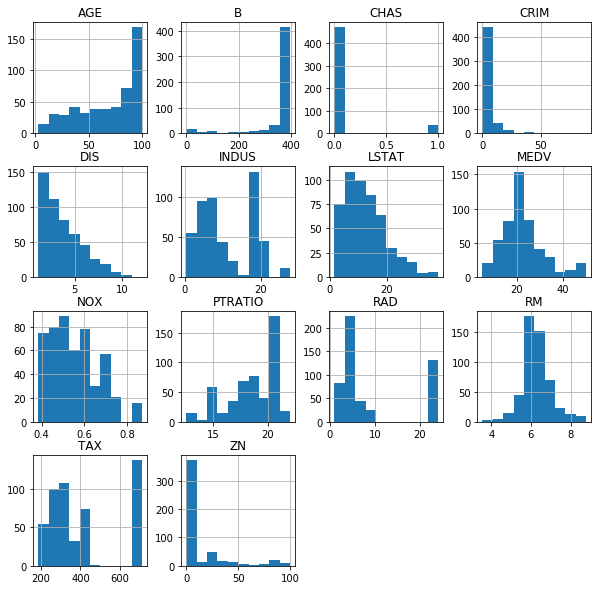

In [13]:
data.hist(figsize = (10,10), sharex = False, sharey = False)
pyplot.show()

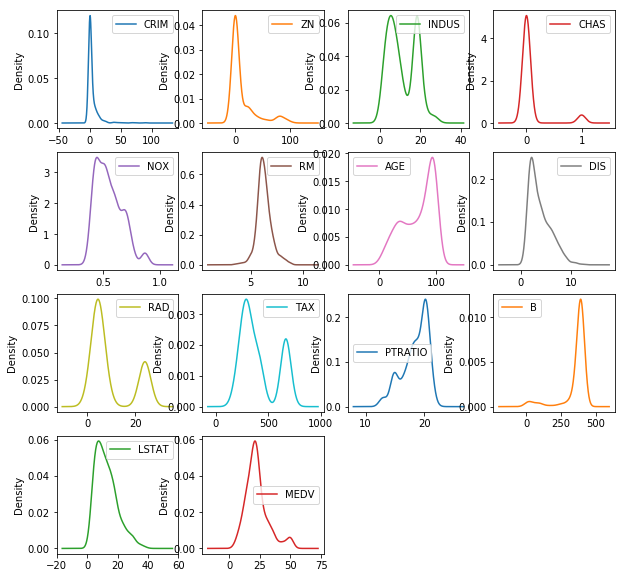

In [14]:
data.plot(kind = 'density', subplots = True, layout = (4,4), figsize = (10,10), sharex = False, sharey = False)
pyplot.show()

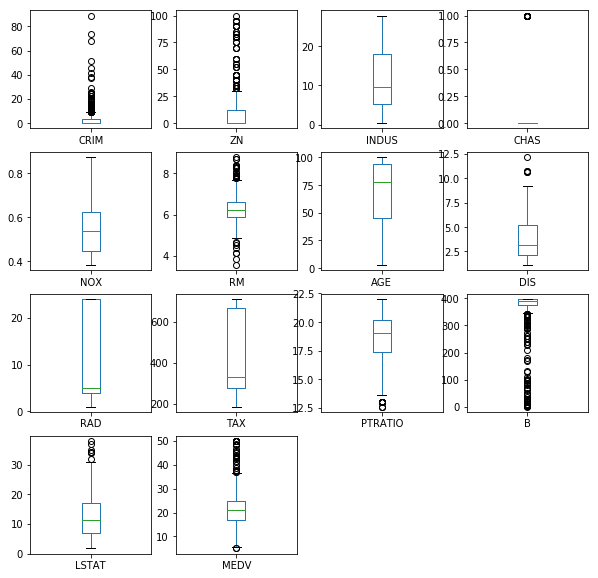

In [15]:
data.plot(kind="box", subplots = True, layout = (4,4), sharex = False, sharey = False, figsize = (10,10))
pyplot.show()

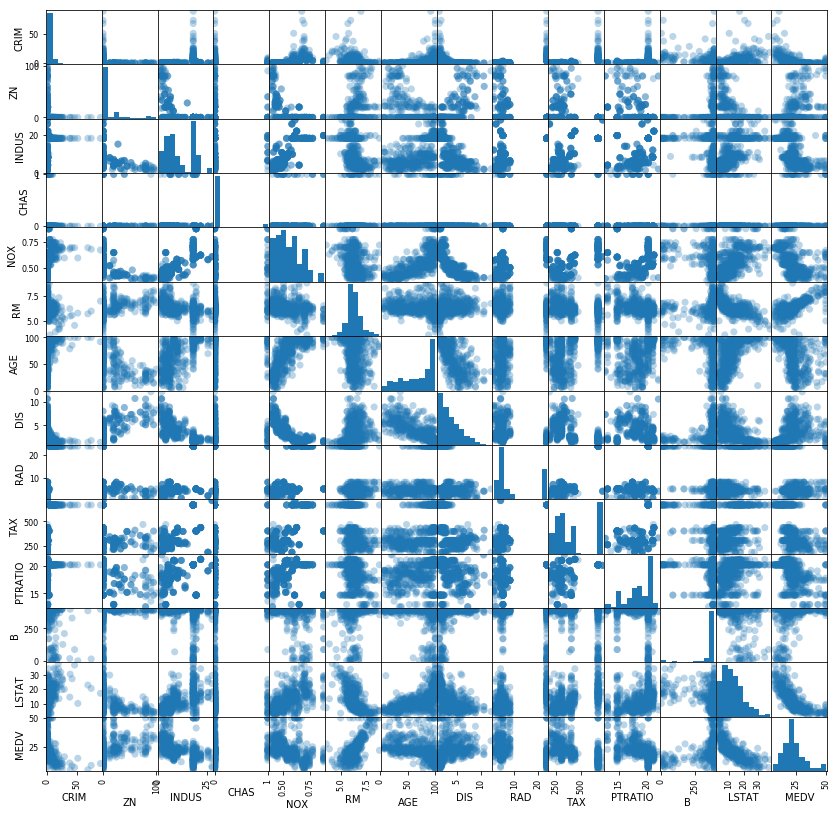

In [16]:
scatter_matrix(data, figsize=(14, 14), alpha = 0.3, s = 200)
pyplot.show()

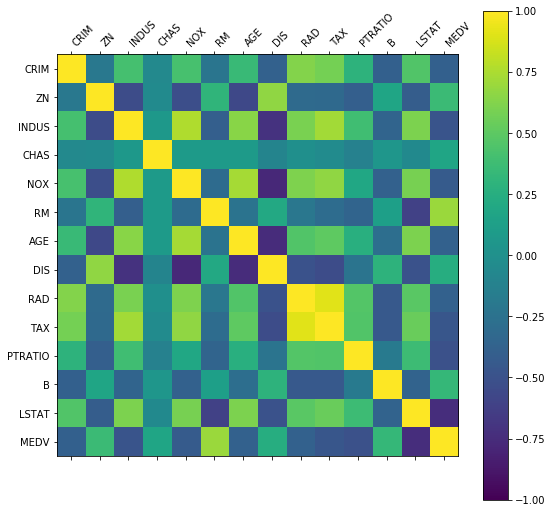

In [17]:
figure = pyplot.figure(figsize=(9, 9))
axis = figure.add_subplot(111)
graph = axis.matshow(corr, vmin = -1, vmax = 1)
figure.colorbar(graph)
ticks = np.arange(0, 14, 1)
axis.set_xticks(ticks)
axis.set_yticks(ticks)
axis.set_xticklabels(list(data)[0:14], rotation='45', ha = 'left')
axis.set_yticklabels(list(data)[0:14])
pyplot.show()

In [18]:
data.loc[1:3, data.columns != 'MEDV']

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
1,0.03,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242.0,17.8,396.90,9.14
2,0.03,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242.0,17.8,392.83,4.03
3,0.03,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222.0,18.7,394.63,2.94


# Model the data

## Create validation data set

In [5]:
# Seperate X and Y values
x = data.values[:, 0:len(data.columns) - 1]
y = data.values[:, len(data.columns) - 1]

print("x.shape = ", x.shape)
print("y.shape = ", y.shape)

# Split out validation set -- 80/20 split
seed = 10
valSize = 0.2

xTrain, xVal, yTrain, yVal = train_test_split(x, y, test_size = valSize, random_state = seed)

print("--------")
print("xTrain.shape = ", xTrain.shape)
print("yTrain.shape = ", yTrain.shape)
print("xVal.shape = ", xVal.shape)
print("yVal.shape = ", yVal.shape)

x.shape =  (506, 13)
y.shape =  (506,)
--------
xTrain.shape =  (404, 13)
yTrain.shape =  (404,)
xVal.shape =  (102, 13)
yVal.shape =  (102,)


## Build models

### Build model function

More info on the `kernal_initializer`:  https://keras.io/initializers/

In [45]:
def buildModel(optimizer = 'adam'):
    model = Sequential()
    
    # distribution='normal' -> Initializer capable of adapting its scale to the shape of weights
    # bias_initializer -> 'zeros' (default per the docs)
    model.add(Dense(20, input_dim = xTrain.shape[1], kernel_initializer='normal', activation = 'relu'))
    model.add(Dense(10, kernel_initializer='normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss = 'mean_squared_error', optimizer = optimizer)
    
    return model   

### Initial pass

For this first pass an educated guess is taken for what might work well on the dataset.  This provides an initial baseline, and then hyperparameter tuning an occur to refine the model.

In [32]:
# Define vars and init
folds = 10
seed = 10

np.random.seed(seed)

model = KerasRegressor(build_fn = buildModel, epochs = 200, batch_size = 5, verbose = 0)
kFold = KFold(n_splits = folds, random_state = seed)
results = cross_val_score(model, xTrain, yTrain, cv = kFold)

print("MSE: %.2f (%.2f)" % (results.mean(), results.std()))

MSE: -17.45 (7.28)


This is better then what the previous write-up's models accomplished with no tuning as of yet:

<pre>
         Model    MSE  StdDev
3    scaledKNN -20.35   11.87
0     scaledLR -21.26    7.11
4   scaledCART -22.66    9.31
1  scaledLASSO -26.94   10.38
5    scaledSVR -28.52   13.98
2     scaledEN -28.60   11.65
</pre>

It does not; however, compare to the results achieved via the ensemble methods:

<pre>
       Model     MSE  StdDev
1  scaledGBM -9.700   5.342 
3  scaledET  -10.339  5.399 
2  scaledRF  -13.695  7.276 
0  scaledAB  -14.176  8.917
</pre>

### Hyperparameter tuning

We're going to cheat by pulling over a function written in a previous write-up, and then updating it to feed the needs of this write-up.

In [37]:
def tuneModel(modelName, modelObj, params, returnModel = False, showSummary = True):
    # Init vars and params
    featureResults = {}
    featureFolds = 10
    featureSeed = 10

    # Use MSE since this is a regression problem
    score = 'neg_mean_squared_error'

    # Create a Pandas DF to hold all our spiffy results
    featureDF = DataFrame(columns = ['Model', 'Accuracy', 'Best Params'])

    # Create feature union
    features = []
    features.append(('Scaler', StandardScaler()))
    featureUnion = FeatureUnion(features)

    # Search for the best combination of parameters
    featureResults = GridSearchCV(
        Pipeline(
            steps = [
                ('FeatureUnion', featureUnion),
                (modelName, modelObj)
        ]),
        param_grid = params,
        scoring = score,
        cv = KFold(n_splits = featureFolds, random_state = featureSeed)      
    ).fit(xTrain, yTrain)

    featureDF.loc[len(featureDF)] = list([
        modelName, 
        featureResults.best_score_,
        featureResults.best_params_,
    ])

    if showSummary:
        set_option('display.max_colwidth', -1)
        display(featureDF)
    
    if returnModel:
        return featureResults

Sanity check to ensure everything works as expected:

In [38]:
modelName = "housingModel"
modelObj =  KerasRegressor(build_fn = buildModel, verbose = 0)
params = {
    'housingModel__epochs' : [ 200 ],
    'housingModel__batch_size' : [ 5 ],
}

tuneModel(modelName, modelObj, params)

,Model,Accuracy,Best Params
0,housingModel,-13.423576,"{'housingModel__batch_size': 5, 'housingModel__epochs': 200}"


This appears to be a reasonable outcome considering that the mean of the various features differed quiet a bit.  The `StandardScaler` clearly improved the model's performance.  We can now engage in further tuning.

We'll consider:
* Epochs
* Batch size
* Optimization algorithm
* Learning rate
* Momentum

Please note; however, the range of options for each parameter category will be kept small, so that the model training will complete in a sane amount of time.  Clearly if this were a commercial application we might expect the training to take days or weeks in order to find the optimal hyperparameters.

In [ ]:
modelName = "housingModel"
modelObj =  KerasRegressor(build_fn = buildModel, verbose = 0)
params = {
    'housingModel__epochs' : makeRange(100, 500, 50, 1, 1),
    'housingModel__batch_size' : makeRange(1, 6, 1, 1, 1),
    'housingModel__optimizer' : ['RMSprop', 'Adagrad', 'Adam']
}

tuneModel(modelName, modelObj, params)

In [42]:
makeRange(100, 500, 50, 1, 1)

[100, 150, 200, 250, 300, 350, 400, 450]

In [44]:
makeRange(1, 6, 1, 1, 1)

[1, 2, 3, 4, 5]

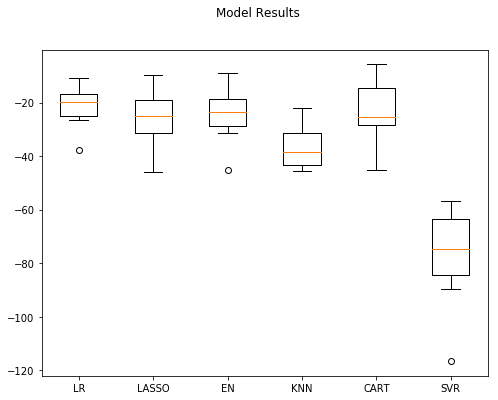

In [21]:
figure = pyplot.figure(figsize = (8,6))
figure.suptitle("Model Results")
axis = figure.add_subplot(111)
pyplot.boxplot(results.values())
axis.set_xticklabels(results.keys())
pyplot.show()

#### Standardize the data and run the models

In [22]:
# Init vars and params
scaledModels = []
scaledResults = {}
scaledFolds = 10
scaledSeed = 10

# Use MSE since this is a regression problem
score = 'neg_mean_squared_error'

# Create a Pandas DF to hold all our spiffy results
scaledDF = DataFrame(columns = ['Model', 'MSE', 'StdDev'])

# Setup the pipelines
pipes = []

# Create the scaled model objects
for modelName, model in models:
    pipes.append(('scaled' + modelName, Pipeline([('Scaler', StandardScaler()),(modelName, model)])))

# Run the models
for modelName, model in pipes:
    # Implement K-fold cross validation where K = 10
    kFold = KFold(n_splits = scaledFolds, random_state = scaledSeed)
    scaledResults[modelName] = cross_val_score(model, xTrain, yTrain, cv=kFold, scoring = score)
    scaledDF.loc[len(scaledDF)] = list([modelName, scaledResults[modelName].mean(), scaledResults[modelName].std()])

# Print results sorted by Mean desc, StdDev asc, Model asc
print(scaledDF.sort_values(by = ['MSE', 'StdDev', 'Model'], ascending = [False, True, True]))


         Model    MSE  StdDev
3    scaledKNN -20.35   11.87
0     scaledLR -21.26    7.11
4   scaledCART -22.66    9.31
1  scaledLASSO -26.94   10.38
5    scaledSVR -28.52   13.98
2     scaledEN -28.60   11.65


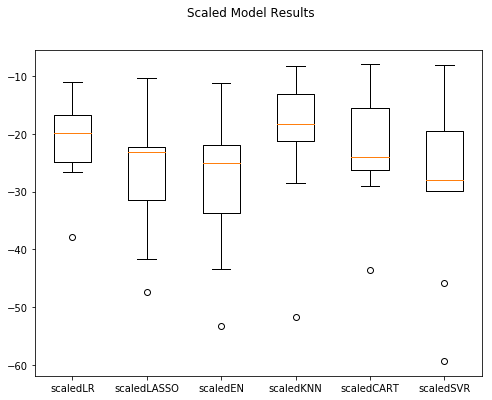

In [23]:
figure = pyplot.figure(figsize = (8,6))
figure.suptitle("Scaled Model Results")
axis = figure.add_subplot(111)
pyplot.boxplot(scaledResults.values())
axis.set_xticklabels(scaledResults.keys())
pyplot.show()

#### Best model hyperparameter tuning

In [24]:
# Tune top model's hyperparameters via grid search
xVals = StandardScaler().fit(xTrain).transform(xTrain)
kVals = list(range(1,25,2))

gridParams = dict(n_neighbors=kVals)
knnModel = KNeighborsRegressor()

kFold = KFold(n_splits=scaledFolds, random_state=scaledSeed)
grid = GridSearchCV(estimator=knnModel, param_grid=gridParams, scoring=score, cv=kFold)
gridResults = grid.fit(xVals, yTrain)

In [26]:
_ = [gridResults.cv_results_['mean_test_score'], gridResults.cv_results_['std_test_score'], gridResults.cv_results_['params']]

knnDF = DataFrame(np.array(_).T, columns = ['MSE', 'StdDev', 'KNN Value'])

set_option('display.width', 600)
set_option('precision', 3)

knnDF.sort_values(by = ['MSE', 'StdDev'], ascending = [False, True])

,MSE,StdDev,KNN Value
1,-18.7,12.2,{'n_neighbors': 3}
3,-18.9,12.7,{'n_neighbors': 7}
4,-19.8,12.4,{'n_neighbors': 9}
2,-20,11.8,{'n_neighbors': 5}
5,-20.2,12.1,{'n_neighbors': 11}
6,-20.7,12.8,{'n_neighbors': 13}
7,-21.5,13.2,{'n_neighbors': 15}
8,-22.8,13.6,{'n_neighbors': 17}
9,-24,13.6,{'n_neighbors': 19}
10,-24.5,13.9,{'n_neighbors': 21}


#### Further linear and nonlinear model tuning

In [27]:
# Init vars and params
featureResults = {}
featureFolds = 10
featureSeed = 10

# Use MSE since this is a regression problem
score = 'neg_mean_squared_error'

# Create a Pandas DF to hold all our spiffy results
featureDF = DataFrame(columns = ['Model', 'MSE', 'Best Params'])

# Pipeline params
params = {
    'FeatureUnion__SelectFeatures__k': list(range(1,len(data.columns)))
}

# Create feature union
features = []
features.append(('Scaler', StandardScaler()))
features.append(('SelectFeatures', SelectKBest(f_regression)))
featureUnion = FeatureUnion(features)


# Setup the pipelines
pipes = []
for modelName, model in models:
    featureResults[modelName] = GridSearchCV(
        Pipeline(
            steps = [
                ('FeatureUnion', featureUnion),
                (modelName, model)
            ]),
        param_grid = params,
        scoring = score,
        cv = KFold(n_splits = featureFolds, random_state = featureSeed)      
    ).fit(xTrain, yTrain)

    featureDF.loc[len(featureDF)] = list([
        modelName, 
        featureResults[modelName].best_score_,
        featureResults[modelName].best_params_,
    ])
    
# Print results sorted by Mean desc, StdDev asc, Model asc
featureDF.sort_values(by = ['MSE', 'Model'], ascending = [False, True])

,Model,MSE,Best Params
3,KNN,-16.545,{'FeatureUnion__SelectFeatures__k': 2}
4,CART,-19.825,{'FeatureUnion__SelectFeatures__k': 10}
0,LR,-21.229,{'FeatureUnion__SelectFeatures__k': 4}
2,EN,-23.439,{'FeatureUnion__SelectFeatures__k': 12}
1,LASSO,-23.883,{'FeatureUnion__SelectFeatures__k': 12}
5,SVR,-32.736,{'FeatureUnion__SelectFeatures__k': 2}



#### Final tuning for best model

In [28]:
# Create a Pandas DF to hold all our spiffy results
featureDF = DataFrame(columns = ['Model', 'MSE', 'Best Params'])

# Pipeline params
params = {
    'FeatureUnion__SelectFeatures__k': list(range(1,len(data.columns))),
    'KNN__n_neighbors' : list(range(1,25,2))
}

# Search for the best combination of parameters
knnResults = GridSearchCV(
    Pipeline(
        steps = [
            ('FeatureUnion', featureUnion),
            ('KNN', KNeighborsRegressor())
        ]),
    param_grid = params,
    scoring = score,
    cv = KFold(n_splits = featureFolds, random_state = featureSeed)      
).fit(xTrain, yTrain)

featureDF.loc[len(featureDF)] = list([
    'KNN', 
    knnResults.best_score_,
    knnResults.best_params_,
])

set_option('display.max_colwidth', -1)
display(featureDF)


,Model,MSE,Best Params
0,KNN,-16.485,"{'FeatureUnion__SelectFeatures__k': 2, 'KNN__n_neighbors': 7}"


### Initial pass - Ensemble methods

In [29]:
# Init vars and params
eModels = []
eResults = {}
eFolds = 10
eSeed = 10

# Use MSE since this is a regression problem
eScore = 'neg_mean_squared_error'

# Create a Pandas DF to hold all our spiffy results
eDF = DataFrame(columns = ['Model', 'MSE', 'StdDev'])

# Create the scaled model objects
eModels.append(('scaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
eModels.append(('scaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
eModels.append(('scaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
eModels.append(('scaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))

# Run the models
for modelName, model in eModels:
    # Implement K-fold cross validation where K = 10
    kFold = KFold(n_splits = eFolds, random_state = eSeed)
    eResults[modelName] = cross_val_score(model, xTrain, yTrain, cv = kFold, scoring = eScore)
    eDF.loc[len(eDF)] = list([modelName, eResults[modelName].mean(), eResults[modelName].std()])

# Print results sorted by Mean desc, StdDev asc, Model asc
print(eDF.sort_values(by = ['MSE', 'StdDev', 'Model'], ascending = [False, True, True]))


       Model     MSE  StdDev
1  scaledGBM -9.700   5.342 
3  scaledET  -10.339  5.399 
2  scaledRF  -13.695  7.276 
0  scaledAB  -14.176  8.917 


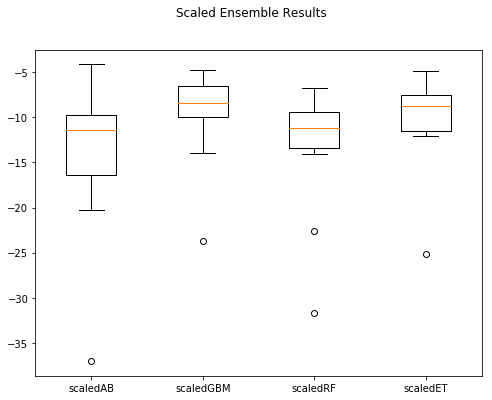

In [30]:
figure = pyplot.figure(figsize = (8,6))
figure.suptitle("Scaled Ensemble Results")
axis = figure.add_subplot(111)
pyplot.boxplot(eResults.values())
axis.set_xticklabels(eResults.keys())
pyplot.show()

#### Best model hyperparameter tuning

In [31]:
# Tune top model's hyperparameters via grid search
xVals = StandardScaler().fit(xTrain).transform(xTrain)
estimatorVals = list(range(50,500,50))

gridParams = dict(n_estimators = estimatorVals)
gbmModel = GradientBoostingRegressor(random_state = eSeed)

kFold = KFold(n_splits = eFolds, random_state = eSeed)
grid = GridSearchCV(estimator=gbmModel, param_grid = gridParams, scoring = eScore, cv = kFold)
gridResults = grid.fit(xVals, yTrain)

In [32]:
_ = [gridResults.cv_results_['mean_test_score'], gridResults.cv_results_['std_test_score'], gridResults.cv_results_['params']]

knnDF = DataFrame(np.array(_).T, columns = ['MSE', 'StdDev', '# Estimators'])

set_option('display.width', 600)
set_option('precision', 3)

knnDF.sort_values(by = ['MSE', 'StdDev'], ascending = [False, True])

,MSE,StdDev,# Estimators
7,-9.55,5.36,{'n_estimators': 400}
6,-9.55,5.4,{'n_estimators': 350}
4,-9.56,5.56,{'n_estimators': 250}
8,-9.56,5.35,{'n_estimators': 450}
5,-9.57,5.45,{'n_estimators': 300}
3,-9.61,5.62,{'n_estimators': 200}
2,-9.67,5.68,{'n_estimators': 150}
1,-9.83,5.63,{'n_estimators': 100}
0,-10.5,6.07,{'n_estimators': 50}


#### Best model predictions

In [33]:
# Very similiar code as for the hyperparamter tuning block above...

# Train the model
xVals = StandardScaler().fit(xTrain).transform(xTrain)
gbmModel = GradientBoostingRegressor(random_state = eSeed, n_estimators = 400)
gbmModel.fit(xVals, yTrain)

# Apply the model to unseen data
xVals = StandardScaler().fit(xTrain).transform(xVal)
preds = gbmModel.predict(xVals)
mse = mean_squared_error(yVal, preds)

print("MSE = ", mse)

MSE =  12.243527834423206
